In [14]:
from kurtogram import fast_kurtogram
import numpy as np

from freq_tools import generateFFT
from scipy import signal as sig

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15, 4)
%matplotlib inline

In [2]:
data = np.genfromtxt('aoyu_example_data.txt',skip_header=23,delimiter='\n')

In [12]:
samplingRate = 100e3
speed = 1000/60

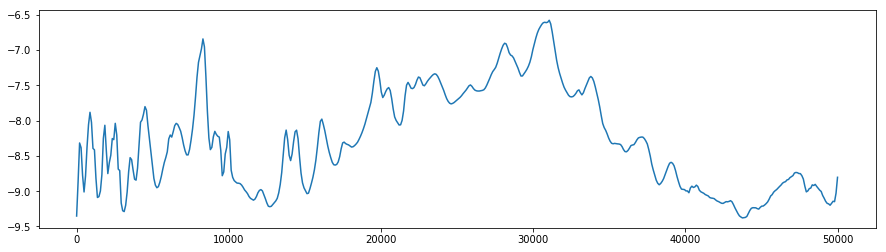

In [17]:
plt.rcParams['figure.figsize'] = (15, 4)
fftFreqs, fftAmps, rawSignal = generateFFT(data,
                                          samplingRate=samplingRate,
                                          nPerSeg=512*2,
                                          averaged=True)
plt.plot(fftFreqs,np.log10(fftAmps))


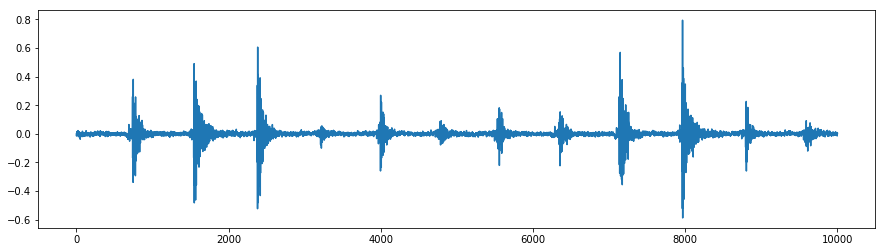

In [18]:
plt.plot(data[:10000])
plt.show()

In [6]:
Kwav, Level_w, freq_w, c = fast_kurtogram(data,samplingRate,nlevel=6)

Max Level: 4.584962500721156
Freq: 1042.1041666666667
Fs: 100000.0
Max Kurtosis: 90.56378979395683
Bandwidth: 2083.3333333333335


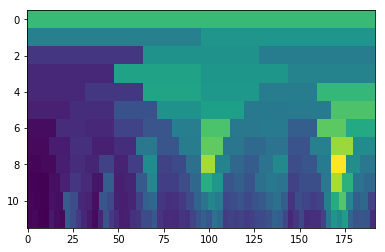

In [19]:
plt.imshow(np.clip(Kwav,0,np.inf),aspect=10)

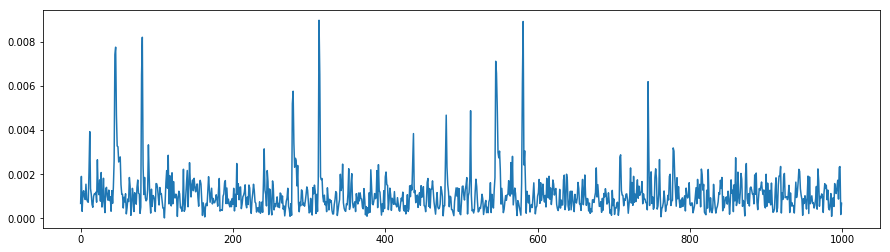

In [20]:
plt.plot(np.abs(c[:1000]))
plt.show()

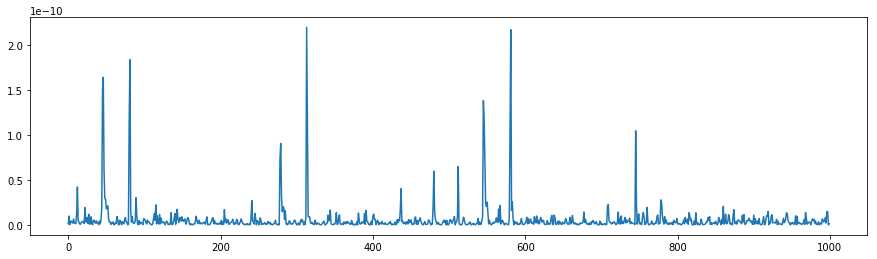

In [21]:
newData = np.abs(c)**2

b_low,a_low = sig.butter(1,10*speed,fs=samplingRate)
b_high,a_high = sig.butter(1,speed,fs=samplingRate)

newData = sig.lfilter(b_low,a_low,newData)
newData = sig.lfilter(b_high,a_high,newData)


plt.plot(newData[:1000])
plt.show()


In [ ]:
fftFreqs, fftAmps = signal.welch(newData.flatten(), fs=int(samplingRate), nperseg=1024)
newData.shape